# Proyecto parte 1

## Introducción 

## Elección de activos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random
from sklearn import linear_model

In [33]:
# Get tickers 
tickers = ['TSLA','AAPL','GOOGL','XOM','SHEL','CVX','PEP','CALM','TSN','PFE','CVS','UNH','TQQQ','VOO','SQQQ', 'VTI']
start_date = '2015-01-01'
end_date = "2023-01-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Close']
St.head()
rt = St.pct_change().dropna()
rt

[*********************100%***********************]  16 of 16 completed


,AAPL,CALM,CVS,CVX,GOOGL,PEP,PFE,SHEL,SQQQ,TQQQ,TSLA,TSN,UNH,VOO,VTI,XOM
Date,,,,,,,,,,,,,,,,
2015-01-05 00:00:00-05:00,-0.028172,-0.022251,-0.009884,-0.039972,-0.019054,-0.007518,-0.005426,-0.047477,0.049284,-0.045008,-0.042041,-0.023029,-0.016471,-0.017569,-0.017183,-0.027362
2015-01-06 00:00:00-05:00,0.000094,-0.035724,0.000743,-0.000463,-0.024679,-0.007575,0.008344,-0.012226,0.036814,-0.039653,0.005664,0.005893,-0.002018,-0.009833,-0.009798,-0.005316
2015-01-07 00:00:00-05:00,0.014022,0.022777,0.018041,-0.000833,-0.002941,0.029241,0.013686,0.011584,-0.037037,0.038470,-0.001562,0.012226,0.010210,0.012495,0.011932,0.010133
2015-01-08 00:00:00-05:00,0.038422,0.023075,0.021266,0.022883,0.003484,0.018174,0.020408,0.020235,-0.058487,0.057034,-0.001564,0.036739,0.047733,0.017568,0.017640,0.016645
2015-01-09 00:00:00-05:00,0.001073,-0.011540,-0.000510,-0.019926,-0.012211,-0.006771,0.004615,-0.012608,0.019581,-0.020247,-0.018802,-0.020631,-0.009360,-0.008421,-0.008290,-0.001410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19 00:00:00-04:00,0.006968,-0.010499,-0.025348,0.000938,-0.003062,-0.000595,-0.007645,-0.006623,0.001666,-0.002180,-0.020183,0.012321,-0.036235,-0.000053,0.000485,-0.003164
2023-04-20 00:00:00-04:00,-0.005846,-0.012378,-0.012936,-0.004863,0.010655,0.003302,-0.009692,0.002439,0.024609,-0.023307,-0.097458,-0.012334,0.002591,-0.005650,-0.006211,-0.007978
2023-04-21 00:00:00-04:00,-0.009781,-0.023456,-0.005597,-0.004298,0.001140,0.000432,0.009034,-0.003082,-0.002597,0.001864,0.012823,0.002300,-0.007467,0.000581,0.000879,0.003200


###  - Normalizar

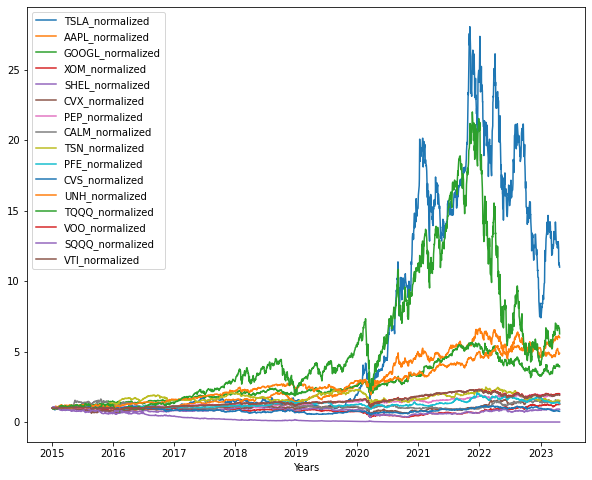

In [34]:
# Normalizamos todos los activos 
normalized = St.copy()
for i in tickers:
    normalized[i+'_normalized'] = St[i]/St[i].iloc[0]

# Veamos la normalización 
normalized = normalized[['TSLA_normalized','AAPL_normalized','GOOGL_normalized',
            'XOM_normalized','SHEL_normalized','CVX_normalized',
            'PEP_normalized','CALM_normalized','TSN_normalized',
            'PFE_normalized','CVS_normalized','UNH_normalized',
            'TQQQ_normalized','VOO_normalized','SQQQ_normalized', 'VTI_normalized']]
#Graficamos
plt.figure(figsize=(10,8))
plt.plot(normalized)
plt.xlabel('Years')
plt.legend(normalized)
plt.show()

## Market Beta, R2, Promedio Acción

In [35]:
import warnings
warnings.filterwarnings('ignore')

betas = {}
for i in tickers : 
    if i != 'VTI' :
        flag_df = rt[[i, 'VTI']]
        y = flag_df[[i]]
        X = flag_df[['VTI']]
        
        # Calculo de beta
        model = LinearRegression()
        model.fit(X, y)
        beta = model.coef_[0][0]
    
        # Calculo de r2
        predictions = model.predict(X)
        promedio = np.mean(y)
    
        var_predictions = np.var(y - predictions)
        var_promedio = np.var(y - promedio)
        r2 = (var_promedio - var_predictions) / var_promedio
    
        # Promedio acción
        promedio_accion = np.mean(y)
    
        # Agregamos todo al jason de betas y anualizamos
        betas[i] = [beta, r2[0], promedio_accion[0] * 252]

betas

{'TSLA': [1.4553809842052872, 0.2322458355154443, 0.4517906266647925],
 'AAPL': [1.1776840581094477, 0.5608009629535502, 0.260099622433901],
 'GOOGL': [1.1138448059451398, 0.5412293237591324, 0.20561672939287134],
 'XOM': [0.9013486209883228, 0.34259198046404826, 0.06979042923052381],
 'SHEL': [0.9678524841683649, 0.30832877927275776, 0.04288349995110269],
 'CVX': [1.0319201373449167, 0.39198354501991234, 0.09786564109524373],
 'PEP': [0.6310935105139551, 0.38759188172915404, 0.10249741072573101],
 'CALM': [0.43326863137046845, 0.06276274532337628, 0.0840720601568023],
 'TSN': [0.6412041499565967, 0.17590863928014114, 0.09276067798460373],
 'PFE': [0.6115868048897808, 0.24814813441000888, 0.06062632827271235],
 'CVS': [0.7150766014880903, 0.2672061076060928, 0.002338806166368423],
 'UNH': [0.874176112392996, 0.3908446655671654, 0.2261504774651922],
 'TQQQ': [3.2691441418325806, 0.8546745747974936, 0.4486031830899581],
 'VOO': [0.9825553773631883, 0.9872058789825797, 0.0999262452086313]

In [40]:
i = 'VTI'
y = flag_df[[i]]
X = flag_df[['VTI']]
model = LinearRegression()
model.fit(X,y)
model.coef_[0][0]

1.0

In [41]:
df = pd.DataFrame()
df['betas'] = [betas[i][0] for i in betas]
df['r2'] = [betas[i][1] for i in betas]
df['rendimiento'] = [betas[i][2] for i in betas]
df['accion'] = [i for i in betas]
df

,betas,r2,rendimiento,accion
0,1.455381,0.232246,0.451791,TSLA
1,1.177684,0.560801,0.260100,AAPL
2,1.113845,0.541229,0.205617,GOOGL
3,0.901349,0.342592,0.069790,XOM
4,0.967852,0.308329,0.042883,SHEL
5,1.031920,0.391984,0.097866,CVX
6,0.631094,0.387592,0.102497,PEP
7,0.433269,0.062763,0.084072,CALM
8,0.641204,0.175909,0.092761,TSN
9,0.611587,0.248148,0.060626,PFE


### - BootStrap R2 y Beta

### - Analisis de la acción